In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# to split and standarize the datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate regression models
from sklearn.metrics import mean_squared_error

# to evaluate classification models
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error

In [3]:
df = pd.read_csv("datasets/rideshare_kaggle.csv")

In [4]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [5]:
df.shape

(693071, 57)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [7]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [8]:
df.isnull().sum().sort_values(ascending=False)  

price                          55095
id                                 0
ozone                              0
temperatureLowTime                 0
apparentTemperatureHigh            0
apparentTemperatureHighTime        0
apparentTemperatureLow             0
apparentTemperatureLowTime         0
icon                               0
dewPoint                           0
pressure                           0
windBearing                        0
cloudCover                         0
uvIndex                            0
visibility.1                       0
sunriseTime                        0
temperatureHighTime                0
sunsetTime                         0
moonPhase                          0
precipIntensityMax                 0
uvIndexTime                        0
temperatureMin                     0
temperatureMinTime                 0
temperatureMax                     0
temperatureMaxTime                 0
apparentTemperatureMin             0
apparentTemperatureMinTime         0
a

In [9]:
df['price'].isnull().mean()

0.07949402009317949

In [10]:
dfx = df.drop(['id','datetime', 'timezone', 'timestamp','latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',"product_id",
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'],axis=1)

In [11]:
dfx.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0


In [12]:
data_=pd.DataFrame(dfx.isnull().sum(),columns=['Number Of Null'])
data_['Percentage']=data_['Number Of Null']/dfx.shape[0]*100
data_

,Number Of Null,Percentage
hour,0,0.000000
day,0,0.000000
month,0,0.000000
source,0,0.000000
destination,0,0.000000
cab_type,0,0.000000
name,0,0.000000
price,55095,7.949402
distance,0,0.000000
surge_multiplier,0,0.000000


In [13]:
dfx.fillna(dfx['price'].median(), inplace = True)

In [14]:
dfx.isnull().sum()

hour                0
day                 0
month               0
source              0
destination         0
cab_type            0
name                0
price               0
distance            0
surge_multiplier    0
dtype: int64

Selanjutnya memeriksa korelasi antar variabel

In [15]:
label = LabelEncoder()
df_encoded = dfx.copy()
for col in df_encoded.select_dtypes(include='O').columns:
    df_encoded[col]=label.fit_transform(df_encoded[col])

In [16]:
df_encoded

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier
0,9,16,12,5,7,0,7,5.0,0.44,1.0
1,2,27,11,5,7,0,2,11.0,0.44,1.0
2,1,28,11,5,7,0,5,7.0,0.44,1.0
3,4,30,11,5,7,0,4,26.0,0.44,1.0
4,3,29,11,5,7,0,6,9.0,0.44,1.0
...,...,...,...,...,...,...,...,...,...,...
693066,23,1,12,11,6,1,11,13.0,1.00,1.0
693067,23,1,12,11,6,1,10,9.5,1.00,1.0
693068,23,1,12,11,6,1,8,13.5,1.00,1.0
693069,23,1,12,11,6,1,1,27.0,1.00,1.0


<Axes: >

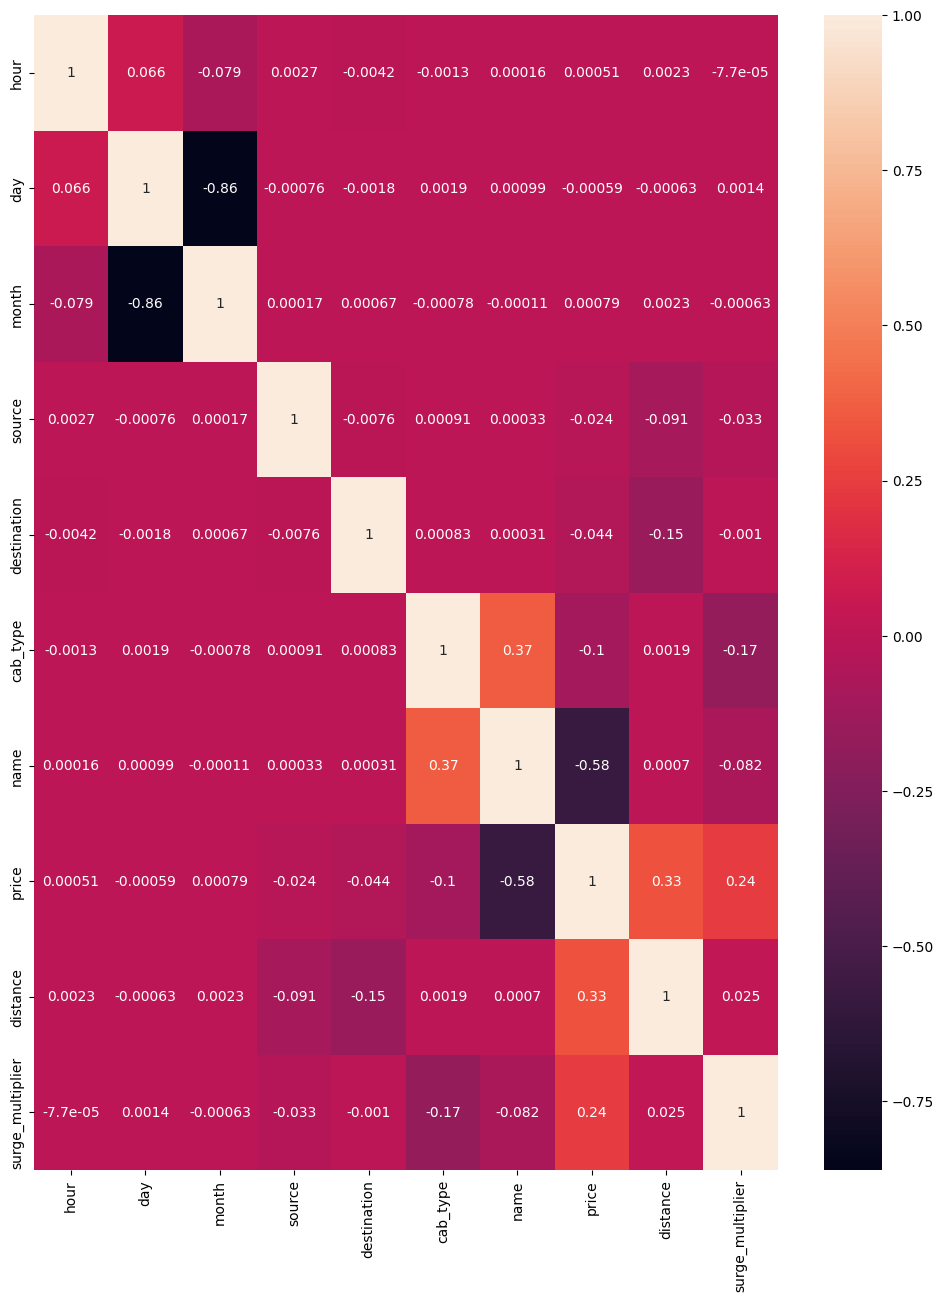

In [17]:
plt.figure(figsize=(12,15))
sns.heatmap(df_encoded.corr(), annot=True)

In [18]:
new_df = dfx.drop(['hour','day','month','source','destination'], axis=1)
new_df.head()

,cab_type,name,price,distance,surge_multiplier
0,Lyft,Shared,5.0,0.44,1.0
1,Lyft,Lux,11.0,0.44,1.0
2,Lyft,Lyft,7.0,0.44,1.0
3,Lyft,Lux Black XL,26.0,0.44,1.0
4,Lyft,Lyft XL,9.0,0.44,1.0


In [19]:
Qp12 = new_df['price'].quantile(0.25)
Qp32 = new_df['price'].quantile(0.75)
IQRp = Qp32-Qp12

In [20]:
print("lower bond: ",Qp12)
print("upper bond: ",Qp32)

lower bond:  9.5
upper bond:  22.5


In [21]:
new_df[new_df['price']>(Qp32+(1.5*IQRp))]

,cab_type,name,price,distance,surge_multiplier
469,Lyft,Lux Black XL,42.5,2.93,1.25
639,Lyft,Lux Black XL,42.5,3.80,1.00
705,Lyft,Lyft XL,42.5,3.25,2.50
706,Lyft,Lux Black,52.5,3.25,2.00
707,Lyft,Lux Black XL,67.5,3.25,2.00
...,...,...,...,...,...
692762,Lyft,Lux Black XL,42.5,4.31,1.00
692775,Lyft,Lux Black XL,42.5,4.13,1.00
692891,Lyft,Lux Black XL,47.5,5.42,1.00
692962,Uber,Black SUV,51.0,7.36,1.00


In [22]:
print('Size before removing :',new_df.shape)
new_df= new_df[~((new_df['price']>(Qp32+(1.5*IQRp))))]
print('Size after removing :',new_df.shape)

Size before removing : (693071, 5)
Size after removing : (685089, 5)


In [23]:
pd_encode = pd.get_dummies(new_df)

In [24]:
pd_encode.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [25]:
X = pd_encode.drop(columns=['price'],axis=1).values
y = pd_encode['price'].values

In [26]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=0)

In [33]:
model1 = LinearRegression()
modelLinear = model1.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [34]:
r2_score(y_test, y_pred)

0.9231671161406403

In [35]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

5.29782087058833
2.3016995613216618


In [36]:
pickle.dump(scaler, open("scaler.pickle", "wb"))
ssc = pickle.load(open("scaler.pickle", 'rb')) 

pickle.dump(modelLinear, open('liniearregression.pkl','wb'))

model = pickle.load(open('liniearregression.pkl','rb'))

In [37]:
sample=ssc.transform([X_test[0]])
sample

array([[  0.78078727, -14.72583232,  -2.6701975 ,   0.6554503 ,
         12.16071608,  -1.37582165,  -1.36429171,  -1.36148801,
         -1.34043651,  -1.3651387 ,  -1.36476703,  -1.36512929,
         -1.38317811,  -1.38315489,  -1.38316882,  -1.3828576 ,
         -1.38317811]])

In [38]:
model.predict(sample)

array([1.84328122e+10])

In [39]:
y_test[0]

39.0